In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train=pd.read_csv('sign_mnist_train.csv')
df_test=pd.read_csv('sign_mnist_test.csv')
y_train=df_train['label'].values
y_test=df_test['label'].values
df_train.drop('label',axis=1,inplace=True)
df_test.drop('label',axis=1,inplace=True)
df_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
x_train=df_train.values
x_test=df_test.values
unique_val = np.array(y_train)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [5]:
x_train=np.array(x_train.reshape(-1,28,28,1))
x_test=np.array(x_test.reshape(-1,28,28,1))

In [6]:
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
from sklearn.preprocessing import LabelBinarizer
lb_train= LabelBinarizer()
lb_test=LabelBinarizer()
y_train=lb_train.fit_transform(y_train)
y_test=lb_test.fit_transform(y_test)

In [8]:
print(y_train)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


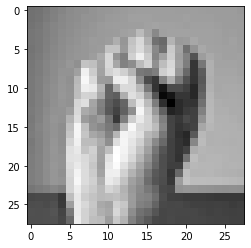

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10].reshape(28,28),cmap='gray')

In [10]:
x_train=x_train/255
x_test=x_test/255

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [12]:
batch_size = 128
num_classes = 24
epochs = 100


In [13]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [19]:
from tensorflow.keras.optimizers import Adam

In [22]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=Adam(),
              metrics=['accuracy'])


In [23]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/100
215/215 [==============================] - 14s 65ms/step - loss: 2.6776 - accuracy: 0.1722 - val_loss: 1.6045 - val_accuracy: 0.5365
Epoch 2/100
215/215 [==============================] - 14s 65ms/step - loss: 1.3184 - accuracy: 0.5513 - val_loss: 0.8707 - val_accuracy: 0.7238
Epoch 3/100
215/215 [==============================] - 14s 67ms/step - loss: 0.8469 - accuracy: 0.7107 - val_loss: 0.5880 - val_accuracy: 0.8016
Epoch 4/100
215/215 [==============================] - 14s 65ms/step - loss: 0.5979 - accuracy: 0.7967 - val_loss: 0.4861 - val_accuracy: 0.8292
Epoch 5/100
215/215 [==============================] - 14s 65ms/step - loss: 0.4432 - accuracy: 0.8493 - val_loss: 0.3664 - val_accuracy: 0.8843
Epoch 6/100
215/215 [==============================] - 14s 65ms/step - loss: 0.3499 - accuracy: 0.8817 - val_loss: 0.3574 - val_accuracy: 0.8667
Epoch 7/100
215/215 [==============================] - 14s 65ms/step - loss: 0.2847 - accuracy: 0.9033 - val_loss: 0.2665 - val_ac

215/215 [==============================] - 16s 72ms/step - loss: 0.0201 - accuracy: 0.9940 - val_loss: 0.1018 - val_accuracy: 0.9658
Epoch 58/100
215/215 [==============================] - 15s 70ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0791 - val_accuracy: 0.9724
Epoch 59/100
215/215 [==============================] - 15s 71ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.1149 - val_accuracy: 0.9619
Epoch 60/100
215/215 [==============================] - 16s 75ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0958 - val_accuracy: 0.9732
Epoch 61/100
215/215 [==============================] - 16s 73ms/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.0818 - val_accuracy: 0.9702
Epoch 62/100
215/215 [==============================] - 15s 71ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.1019 - val_accuracy: 0.9663
Epoch 63/100
215/215 [==============================] - 14s 65ms/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.0702 - val_accuracy

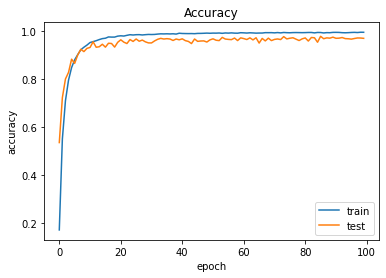

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [35]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


In [36]:
import cv2
from keras.preprocessing.image import img_to_array
alphabet=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
def classify(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    proba=model.predict(image)
    idx = np.argmax(proba)
    return alphabet[idx]

In [37]:
classify(x_train[3]*255)

'C'

In [38]:
print(y_train[3])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
